<a href="https://colab.research.google.com/github/rahulsing/pytorch_demo/blob/master/05_CIFAR_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
trainset=torchvision.datasets.CIFAR10(root='./datasets',train=True,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [6]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=8,shuffle=False,num_workers=0)

In [10]:
testset=torchvision.datasets.CIFAR10(root='./datasets',train=False,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [9]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [0]:
testloader=torch.utils.data.DataLoader(testset,batch_size=8,shuffle=False,num_workers=2)

In [0]:
labels=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
images_batch, lables_batch=iter(trainloader).next()

In [19]:
images_batch.shape


torch.Size([8, 3, 32, 32])

torch.Size([8, 3, 32, 32]) 
batch size: 8
channels:3
each image: 32X32

In [0]:
img=torchvision.utils.make_grid(images_batch)

In [22]:
img.shape
#torch.Size([3, 36, 274]) [8 image] , thne number of channel, height( with padding), width

torch.Size([3, 36, 274])

In [23]:
#in order to view this image in matplot, the channel needs to be last dimention, for this we will perfom transform on image dimention
np.transpose(img,(1,2,0)).shape
# torch.Size([36, 274, 3])

torch.Size([36, 274, 3])

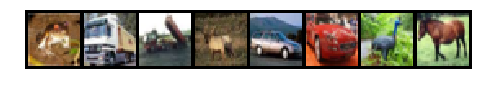

In [25]:
plt.imshow(np.transpose(img,(1,2,0)))
plt.axis('off')
plt.show()

In [0]:
import torch.nn as  nn


In [0]:
in_size=3 # RBG , 3 chanel of image
hid1_size=16 # no of channel output by the first convolution layer = 16 , this layer will produce feature map, it will 16 feature map
hid2_size=32 # 2nd layer will output 32 feature map
out_size= len(labels) # no. of category and will be 10, as this is CIFR10 dataset
k_conv_size=5 #5X5 kernel 


In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(in_size,hid1_size,k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.layer2=nn.Sequential(
        nn.Conv2d(hid1_size,hid2_size,k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.fc=nn.Linear(hid2_size*k_conv_size*k_conv_size,out_size)
   
  def forward(self,x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=out.reshape(out.size(0),-1)
    out=self.fc(out)
    
    return out

In [0]:
model=ConvNet()

In [0]:
learning_rate=0.001
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [0]:
total_step=len(trainloader)
num_epochs=5

In [0]:
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(trainloader):
    outputs=model(images)
    loss=criterion(outputs,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if(i+1)%2000==0:
      print('Epoch [{}/{}], Step [{}/{}],Loss {:4f}'.format(epoch+1,num_epochs,i+1,total_step,loss.item()))

Epoch [1/5], Step [2000/6250],Loss 2.386487
Epoch [1/5], Step [4000/6250],Loss 2.281614
Epoch [1/5], Step [6000/6250],Loss 2.175458
Epoch [2/5], Step [2000/6250],Loss 2.386487
Epoch [2/5], Step [4000/6250],Loss 2.281614
